<a href="https://colab.research.google.com/github/AmirHosseinAlikhahMishamandani/SQLZoo/blob/main/SQLZoo_SELECT_from_WORLD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SQLZoo - SELECT from WORLD

You need to go to this [Github repo](https://github.com/AmirHosseinAlikhahMishamandani/worldometers-data-scraper) to get the code for data scrapping or download the already available csv file.

# Initialization

In [1]:
import sqlite3
from sqlite3 import Error
import csv
import pandas as pd

class DBsqlite():
    def create_connection(self, path):
        connection = None
        try:
            connection = sqlite3.connect(path)
            connection.text_factory = str
        except Error as e:
            print("Error occurred: " + str(e))

        return connection

    def execute_query(self, connection, query):
        cursor = connection.cursor()
        try:
            if query == "":
                return "Query Blank"
            else:
                cursor.execute(query)
                connection.commit()
                return "Query executed successfully"
        except Error as e:
            return "Error occurred: " + str(e)

In [2]:
db = DBsqlite()


try:
  conn = db.create_connection("SQLZoo")
except:
  print("Database Creation Error")


cursor = conn.cursor()

## Creating TABLE world



In [3]:
cursor.execute("CREATE TABLE IF NOT EXISTS world (Country TEXT, Continent TEXT, Population REAL, Area REAL, GDP REAL);")

## Loading the csv file into a TABLE



In [4]:
# Open the CSV file for reading
with open('Countries_data.csv', 'r') as csv_file:
    csv_reader = csv.reader(csv_file)

    # Skip the header row
    next(csv_reader)

    # Insert data from the CSV file into the SQLite table
    for row in csv_reader:
        population = float(row[2].replace(',', ''))
        area = float(row[3].replace(',', ''))
        gdp_str = row[4].replace(',', '').replace('$', '')
        gdp = float(gdp_str) if gdp_str else None

        cursor.execute("INSERT INTO world VALUES (?, ?, ?, ?, ?)", (row[0], row[1], population, area, gdp))

### Printing the entire TABLE

In [5]:
try:
    cursor.execute("SELECT * FROM world;")
    results = cursor.fetchall()
    if results:
        print("Contents of the 'world' table:")
        df = pd.DataFrame(results, columns=[desc[0] for desc in cursor.description])
        print(df)
    else:
        print("The table is empty.")
except Exception as e:
    print("An error occurred:", e)

Contents of the 'world' table:
           Country Continent    Population       Area           GDP
0            China      Asia  1.425671e+09  9388211.0  1.796320e+13
1            India      Asia  1.428628e+09  2973190.0  3.385090e+12
2        Indonesia      Asia  2.775341e+08  1811570.0  1.319100e+12
3         Pakistan      Asia  2.404857e+08   770880.0  3.765330e+11
4       Bangladesh      Asia  1.729543e+08   130170.0  4.602010e+11
..             ...       ...           ...        ...           ...
228  Liechtenstein    Europe  3.958400e+04      160.0           NaN
229         Monaco    Europe  3.629700e+04        1.0           NaN
230     San Marino    Europe  3.364200e+04       60.0           NaN
231      Gibraltar    Europe  3.268800e+04       10.0           NaN
232       Holy See    Europe  5.180000e+02        0.0           NaN

[233 rows x 5 columns]


## 1. Introduction

Observe the result of running this SQL command to show the name, continent and population of all countries.


In [6]:
try:
    cursor.execute("SELECT TRIM(Country), continent, population FROM world;")
    result = cursor.fetchall()
    df = pd.DataFrame(result, columns=["Country", "Continent", "Population"])
    print(df)
except Exception as e:
    print("An error occurred:", e)

           Country Continent    Population
0            China      Asia  1.425671e+09
1            India      Asia  1.428628e+09
2        Indonesia      Asia  2.775341e+08
3         Pakistan      Asia  2.404857e+08
4       Bangladesh      Asia  1.729543e+08
..             ...       ...           ...
228  Liechtenstein    Europe  3.958400e+04
229         Monaco    Europe  3.629700e+04
230     San Marino    Europe  3.364200e+04
231      Gibraltar    Europe  3.268800e+04
232       Holy See    Europe  5.180000e+02

[233 rows x 3 columns]


## 2. Large Countries

Show the name for the countries that have a population of at least 200 million. 200 million is 200000000, there are eight zeros.

In [7]:
try:
    cursor.execute("SELECT TRIM(Country) FROM world WHERE population >= 200000000;")
    result = cursor.fetchall()
    df = pd.DataFrame(result, columns=["Country"])
    print(df)
except Exception as e:
    print("An error occurred:", e)

         Country
0          China
1          India
2      Indonesia
3       Pakistan
4        Nigeria
5  United States
6         Brazil


## 3. Per capita GDP

Give the name and the per capita GDP for those countries with a population of at least 200 million.

In [8]:
try:
    cursor.execute("SELECT TRIM(Country), GDP/population FROM world WHERE population >= 200000000;")
    result = cursor.fetchall()
    df = pd.DataFrame(result, columns=["Country", "per capita GDP"])
    print(df)
except Exception as e:
    print("An error occurred:", e)

         Country  per capita GDP
0          China    12599.818307
1          India     2369.469728
2      Indonesia     4752.929083
3       Pakistan     1565.719150
4        Nigeria     2133.047899
5  United States    74891.051178
6         Brazil     8872.000273


## 4. South America In millions

Show the name and population in millions for the countries of the continent 'South America'. Divide the population by 1000000 to get population in millions.

In [9]:
try:
    cursor.execute("SELECT TRIM(Country), population/1000000 FROM world WHERE continent LIKE 'Latin%';")
    result = cursor.fetchall()
    df = pd.DataFrame(result, columns=["Country", "population in millions"])
    print(df)
except Exception as e:
    print("An error occurred:", e)

                     Country  population in millions
0                     Brazil              216.422446
1                     Mexico              128.455567
2                   Colombia               52.085168
3                  Argentina               45.773884
4                       Peru               34.352719
5                  Venezuela               28.838499
6                      Chile               19.629590
7                    Ecuador               18.190484
8                  Guatemala               18.092026
9                    Bolivia               12.388571
10                      Cuba               11.194449
11                     Haiti               11.724763
12        Dominican Republic               11.332972
13                  Honduras               10.593798
14                 Nicaragua                7.046310
15                  Paraguay                6.861524
16               El Salvador                6.364943
17                Costa Rica                5.

## 5. France, Germany, Italy

Show the name and population for France, Germany, Italy

In [10]:
try:
    cursor.execute("SELECT TRIM(Country), population FROM world WHERE country IN ('France', 'Germany', 'Italy');")
    result = cursor.fetchall()
    df = pd.DataFrame(result, columns=["Country", "population in millions"])
    print(df)
except Exception as e:
    print("An error occurred:", e)

   Country  population in millions
0  Germany              83294633.0
1   France              64756584.0
2    Italy              58870762.0


## 6. United

Show the countries which have a name that includes the word 'United'

In [11]:
try:
    cursor.execute("SELECT TRIM(Country) FROM world WHERE country LIKE '%United%';")
    result = cursor.fetchall()
    df = pd.DataFrame(result, columns=["Country"])
    print(df)
except Exception as e:
    print("An error occurred:", e)

                Country
0  United Arab Emirates
1         United States
2        United Kingdom


## 7. Two ways to be big

Two ways to be big: A country is big if it has an area of more than 3 million sq km or it has a population of more than 250 million.

Show the countries that are big by area or big by population. Show name, population and area.

In [12]:
try:
    cursor.execute("SELECT TRIM(Country), population, area FROM world WHERE area > 3000000 OR population > 250000000;")
    result = cursor.fetchall()
    df = pd.DataFrame(result, columns=["Country", "population", "area"])
    print(df)
except Exception as e:
    print("An error occurred:", e)

         Country    population        area
0          China  1.425671e+09   9388211.0
1          India  1.428628e+09   2973190.0
2      Indonesia  2.775341e+08   1811570.0
3      Australia  2.643911e+07   7682300.0
4  United States  3.399966e+08   9147420.0
5         Canada  3.878129e+07   9093510.0
6         Brazil  2.164224e+08   8358140.0
7         Russia  1.444444e+08  16376870.0


## 8. One or the other (but not both)

Exclusive OR (XOR). Show the countries that are big by area (more than 3 million) or big by population (more than 250 million) but not both. Show name, population and area.

Australia has a big area but a small population, it should be included.
Indonesia has a big population but a small area, it should be included.
China has a big population and big area, it should be excluded.
United Kingdom has a small population and a small area, it should be excluded.

In [13]:
try:
    cursor.execute("SELECT TRIM(Country), population, area FROM world WHERE (area > 3000000 OR population > 250000000) AND NOT (area > 3000000 AND population > 250000000);")
    result = cursor.fetchall()
    df = pd.DataFrame(result, columns=["Country", "population", "area"])
    print(df)
except Exception as e:
    print("An error occurred:", e)

     Country    population        area
0      India  1.428628e+09   2973190.0
1  Indonesia  2.775341e+08   1811570.0
2  Australia  2.643911e+07   7682300.0
3     Canada  3.878129e+07   9093510.0
4     Brazil  2.164224e+08   8358140.0
5     Russia  1.444444e+08  16376870.0


## 9. Rounding

Show the name and population in millions and the GDP in billions for the countries of the continent 'South America'. Use the ROUND function to show the values to two decimal places.

For Americas show population in millions and GDP in billions both to 2 decimal places.
Millions and billions
Missing decimals
For some version of SQL the division of an integer by an integer will be an integer. One way to prevent this is to divide by a floating point number such as 1000000.0.

In [14]:
try:
    cursor.execute("SELECT TRIM(Country), ROUND(population/1000000, 2), ROUND(GDP/1000000000, 2) FROM world WHERE continent LIKE '%Latin%';")
    result = cursor.fetchall()
    df = pd.DataFrame(result, columns=["Country", "population (m)", "GDP (B)"])
    print(df)
except Exception as e:
    print("An error occurred:", e)

                     Country  population (m)  GDP (B)
0                     Brazil          216.42  1920.10
1                     Mexico          128.46  1414.19
2                   Colombia           52.09   343.94
3                  Argentina           45.77   632.77
4                       Peru           34.35   242.63
5                  Venezuela           28.84      NaN
6                      Chile           19.63   301.03
7                    Ecuador           18.19   115.05
8                  Guatemala           18.09    95.00
9                    Bolivia           12.39    43.07
10                      Cuba           11.19      NaN
11                     Haiti           11.72    20.25
12        Dominican Republic           11.33   113.64
13                  Honduras           10.59    31.72
14                 Nicaragua            7.05    15.67
15                  Paraguay            6.86    41.72
16               El Salvador            6.36    32.49
17                Costa Rica

### Play the SELECT card game

In [15]:
from IPython.display import IFrame

# Replace the URL below with the URL of the interactive webpage you want to load
url = "https://sqlzoo.net/40289347/"

# Set the width and height of the embedded frame
width = "800px"
height = "600px"

# Create the IFrame widget to embed the webpage
IFrame(src=url, width=width, height=height)


## 10. Trillion dollar economies

Show the name and per-capita GDP for those countries with a GDP of at least one trillion (1000000000000; that is 12 zeros). Round this value to the nearest 1000.

Show per-capita GDP for the trillion dollar countries to the nearest $1000.

In [16]:
try:
    cursor.execute("SELECT TRIM(Country), ROUND(GDP/POPULATION, -3) FROM world WHERE GDP >= 1000000000000;")
    result = cursor.fetchall()
    df = pd.DataFrame(result, columns=["Country", "GDP per Capita"])
    print(df)
except Exception as e:
    print("An error occurred:", e)

           Country  GDP per Capita
0            China         12600.0
1            India          2369.0
2        Indonesia          4753.0
3            Japan         34317.0
4      South Korea         32158.0
5     Saudi Arabia         29993.0
6        Australia         63369.0
7    United States         74891.0
8           Canada         55177.0
9           Brazil          8872.0
10          Mexico         11009.0
11          Russia         15511.0
12         Germany         48889.0
13  United Kingdom         45332.0
14          France         42975.0
15           Italy         34150.0
16           Spain         29409.0


## 11. Name and capital have the same length

Greece has capital Athens.

Each of the strings 'Greece', and 'Athens' has 6 characters.

Show the name and capital where the name and the capital have the same number of characters.

You can use the LENGTH function to find the number of characters in a string.





> It was not given in the table I've collected at first, so just sharing my answer here!



In [ ]:
# DO NOT RUN THIS CODE
try:
    cursor.execute("SELECT TRIM(Country), capital FROM world WHERE LENGTH(name) = LENGTH(capital);")
    result = cursor.fetchall()
    df = pd.DataFrame(result, columns=["Country", "capital"])
    print(df)
except Exception as e:
    print("An error occurred:", e)

| Country         | capital     |
|--------------|-------------|
| Algeria      | Algiers     |
| Angola       | Luanda      |
| Armenia      | Yerevan     |
| Botswana     | Gaborone    |
| Canada       | Ottawa      |
| Djibouti     | Djibouti    |
| Egypt        | Cairo       |
| Estonia      | Tallinn     |
| Fiji         | Suva        |
| Georgia      | Tbilisi     |
| Ghana        | Accra       |
| Greece       | Athens      |
| Japan        | Tokyo       |
| Luxembourg   | Luxembourg  |
| Mauritania   | Nouakchott  |
| Peru         | Lima        |
| Poland       | Warsaw      |
| Russia       | Moscow      |
| Rwanda       | Kigali      |
| San Marino   | San Marino  |
| Singapore    | Singapore   |
| Taiwan       | Taipei      |
| Turkey       | Ankara      |
| Yemen        | Sanaa       |
| Zambia       | Lusaka      |


## 12. Matching name and capital

The capital of Sweden is Stockholm. Both words start with the letter 'S'.

Show the name and the capital where the first letters of each match. Don't include countries where the name and the capital are the same word.
1. You can use the function LEFT to isolate the first character.
2. You can use <> as the NOT EQUALS operator.

> It was not given in the table I've collected at first, so just sharing my answer here!

In [ ]:
# DO NOT RUN THIS CODE
try:
    cursor.execute("SELECT TRIM(Country), capital FROM world WHERE LEFT(Country, 1) = LEFT(capital, 1) AND Country <> capital;")
    result = cursor.fetchall()
    df = pd.DataFrame(result, columns=["Country", "capital"])
    print(df)
except Exception as e:
    print("An error occurred:", e)

| name                | capital                |
|---------------------|------------------------|
| Algeria             | Algiers                |
| Andorra             | Andorra la Vella       |
| Barbados            | Bridgetown             |
| Belize              | Belmopan               |
| Brazil              | Brasília               |
| Brunei              | Bandar Seri Begawan    |
| Guatemala           | Guatemala City         |
| Guyana              | Georgetown             |
| Kuwait              | Kuwait City            |
| Maldives            | Malé                   |
| Marshall Islands    | Majuro                 |
| Mexico              | Mexico City            |
| Monaco              | Monaco City            |
| Mozambique          | Maputo                 |
| Niger               | Niamey                 |
| Panama              | Panama City            |
| Papua New Guinea    | Port Moresby           |
| São Tomé and Príncipe | São Tomé            |
| South Korea         | Seoul                  |
| Sri Lanka           | Sri Jayawardenepura Kotte |
| Sweden              | Stockholm              |
| Taiwan              | Taipei                 |
| Tunisia             | Tunis                  |


## 13. All the vowels

Equatorial Guinea and Dominican Republic have all of the vowels (a e i o u) in the name. They don't count because they have more than one word in the name.

Find the country that has all the vowels and no spaces in its name.

1. You can use the phrase name NOT LIKE '%a%' to exclude characters from your results.
2. The query shown misses countries like Bahamas and Belarus because they contain at least one 'a'

In [19]:
try:
    cursor.execute("SELECT TRIM(Country) FROM world WHERE Country NOT LIKE '% %' AND Country LIKE '%a%' AND Country LIKE '%e%' AND Country LIKE '%i%' AND Country LIKE '%o%' AND Country LIKE '%u%';")
    result = cursor.fetchall()
    df = pd.DataFrame(result, columns=["Country"])
    print(df)
except Exception as e:
    print("An error occurred:", e)

      Country
0  Mozambique


# BBC QUIZ

## 1. Select the code which gives the name of countries beginning with U

In [21]:
try:
    cursor.execute("SELECT TRIM(Country) FROM world WHERE Country LIKE 'U%';")
    result = cursor.fetchall()
    df = pd.DataFrame(result, columns=["Country"])
    print(df)
except Exception as e:
    print("An error occurred:", e)

                Country
0            Uzbekistan
1  United Arab Emirates
2                Uganda
3         United States
4               Uruguay
5   U.S. Virgin Islands
6        United Kingdom
7               Ukraine


## 2. Select the code which shows just the population of United Kingdom?

In [24]:
try:
    cursor.execute("SELECT population FROM world WHERE country = 'United Kingdom';")
    result = cursor.fetchall()
    df = pd.DataFrame(result, columns=["population"])
    print(df)
except Exception as e:
    print("An error occurred:", e)

   population
0  67736802.0


## 3. Select the answer which shows the problem with this SQL code - the intended result should be the continent of France:



```
 SELECT continent
   FROM world
  WHERE 'name' = 'France'
```



In [25]:
try:
    cursor.execute("SELECT continent FROM world WHERE country = 'France';")
    result = cursor.fetchall()
    df = pd.DataFrame(result, columns=["continent"])
    print(df)
except Exception as e:
    print("An error occurred:", e)

  continent
0    Europe


## 4. Select the result that would be obtained from the following code:



```
 SELECT name, population / 10
  FROM world
 WHERE population < 10000
```



In [27]:
try:
    cursor.execute("SELECT TRIM(Country), population/10 FROM world WHERE population < 10000;")
    result = cursor.fetchall()
    df = pd.DataFrame(result, columns=["Country", "Population"])
    print(df)
except Exception as e:
    print("An error occurred:", e)

                   Country  Population
0             Saint Helena       531.4
1                     Niue       193.5
2                  Tokelau       189.3
3  Saint Pierre & Miquelon       584.0
4               Montserrat       438.6
5         Falkland Islands       379.1
6                 Holy See        51.8




> This question contains an error! It doesn't tell us based on which given table!



## 5. Select the code which would reveal the name and population of countries in Europe and Asia


In [28]:
try:
    cursor.execute("SELECT TRIM(Country), population FROM world WHERE continent IN ('Europe', 'Asia');")
    result = cursor.fetchall()
    df = pd.DataFrame(result, columns=["Country", "Population"])
    print(df)
except Exception as e:
    print("An error occurred:", e)

          Country    Population
0           China  1.425671e+09
1           India  1.428628e+09
2       Indonesia  2.775341e+08
3        Pakistan  2.404857e+08
4      Bangladesh  1.729543e+08
..            ...           ...
93  Liechtenstein  3.958400e+04
94         Monaco  3.629700e+04
95     San Marino  3.364200e+04
96      Gibraltar  3.268800e+04
97       Holy See  5.180000e+02

[98 rows x 2 columns]


## 6. Select the code which would give two rows


In [30]:
try:
    cursor.execute("SELECT TRIM(Country) FROM world WHERE country IN ('Cuba', 'Togo');")
    result = cursor.fetchall()
    df = pd.DataFrame(result, columns=["Country"])
    print(df)
except Exception as e:
    print("An error occurred:", e)

  Country
0    Togo
1    Cuba


## 7. Select the result that would be obtained from this code:



```
SELECT name FROM world
WHERE continent = 'South America'
AND population > 40000000
```



In [31]:
try:
    cursor.execute("SELECT TRIM(Country) FROM world WHERE continent LIKE 'Latin%' AND population > 40000000;")
    result = cursor.fetchall()
    df = pd.DataFrame(result, columns=["Country"])
    print(df)
except Exception as e:
    print("An error occurred:", e)

     Country
0     Brazil
1     Mexico
2   Colombia
3  Argentina


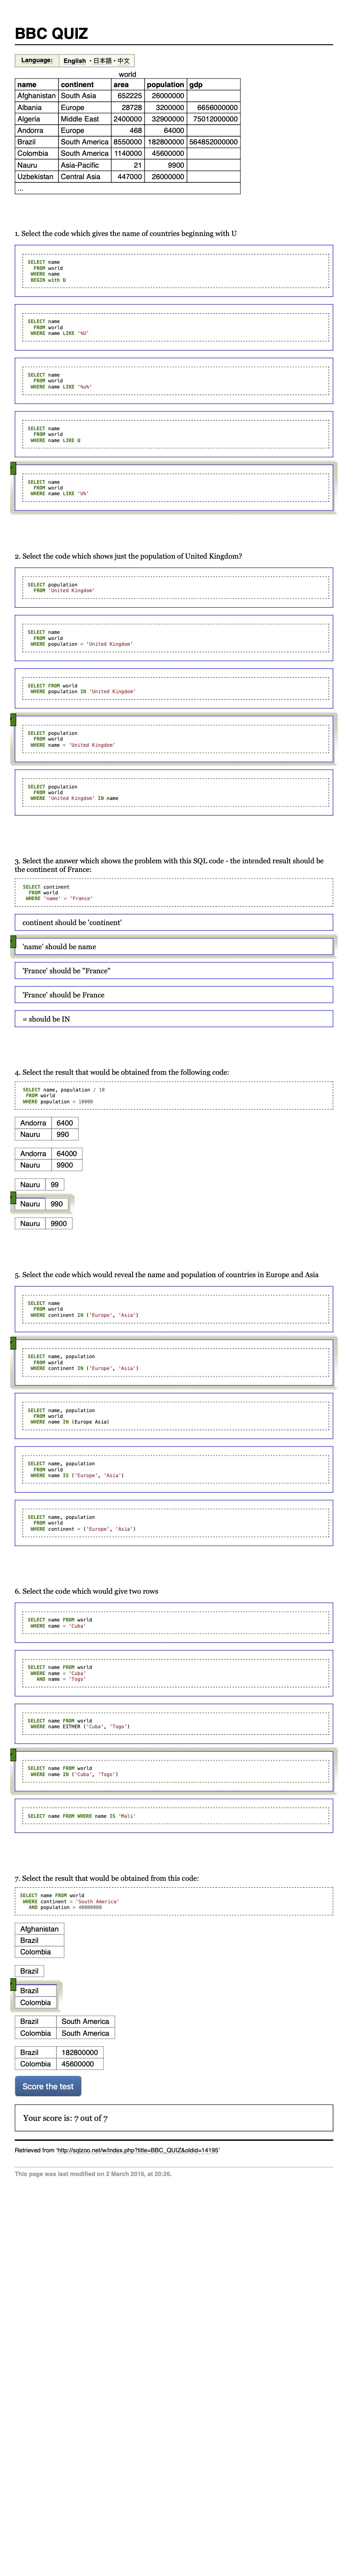